In [1]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
pd.options.display.float_format = '{:.0f}'.format


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/company_nps_data.csv', encoding='cp949')

In [5]:
train

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [6]:
# 결측치 확인
print(train.info())
print(len(train.groupby('회사ID')))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB
None
5000


In [7]:
train['년월'] = pd.to_datetime(train['년도'].astype(str) + train['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

In [8]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


# 상관 관계가 있는 항목
- 연매출액과 월별_직원수 
- 연매출액과 월별_연금보험료
- 월별_직원수와 월별_연금보험료

외에 상관관계는 없는것으로 판단

In [9]:
### 직원수 증감률 및 매출액 증감률 계산
def make_increase_ratio(df):
  df['직원수증감률'] = round(df.groupby('회사ID')['월별_직원수'].pct_change(),4) *100
  df['매출액증감률'] = round(df.groupby('회사ID')['연매출액'].pct_change(),4) *100
  df['보험료증감률'] = round(df.groupby('회사ID')['월별_연금보험료'].pct_change(), 4) *100
  return df

In [10]:
### 매출액 대비 인원수 컬럼 추가
def make_sales_employee_ratio(df):
  df['1인당매출액'] = (df['연매출액']/df['월별_직원수'])
  df['매출액대비연금료'] = round((df['월별_연금보험료']/df['연매출액']),4)* 100
  return df

In [11]:
df = make_increase_ratio(train)
df = make_sales_employee_ratio(df)
df= df.sort_values(['회사ID','년월'])

In [12]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,직원수증감률,매출액증감률,보험료증감률,1인당매출액,매출액대비연금료
33039,63,11328779396,2018,1,403119840,1006,201801,0,0,1,11261212,4
74251,63,11328779396,2018,2,406770960,1018,201802,0,0,-3,11128467,4
80947,63,11328779396,2018,3,404826240,1013,201803,0,0,0,11183395,4
80770,63,11328779396,2018,4,404211800,1012,201804,1,0,-3,11194446,4
28110,63,11328779396,2018,5,400339640,1002,201805,1,0,-3,11306167,4
...,...,...,...,...,...,...,...,...,...,...,...,...
244,3312354,1451563,2019,9,1312200,3,201909,nan,nan,nan,483854,90
38757,3312354,1451563,2019,10,1312200,3,201910,0,0,0,483854,90
49019,3312354,1451563,2019,11,1312200,3,201911,0,0,0,483854,90
72163,3312354,1451563,2019,12,1312200,3,201912,0,0,0,483854,90


In [13]:
# null값 확인
df.isnull().sum()

회사ID           0
연매출액           0
년도             0
월              0
월별_연금보험료       0
월별_직원수         0
년월             0
직원수증감률      5002
매출액증감률      5000
보험료증감률      5002
1인당매출액         0
매출액대비연금료       0
dtype: int64

In [14]:
# 월별데이터 확인
df.groupby('회사ID')['년도'].value_counts()

회사ID     년도  
63       2018    12
95       2018    12
102      2018     8
295      2018     8
414      2018    12
                 ..
2400284  2018     7
2437574  2018     1
2693684  2019     6
3312354  2019     5
5159723  2019     1
Name: 년도, Length: 10111, dtype: int64

In [15]:
df['연매출액'].describe()
df.sort_values(['회사ID', '연매출액'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,직원수증감률,매출액증감률,보험료증감률,1인당매출액,매출액대비연금료
33039,63,11328779396,2018,1,403119840,1006,201801,0,0,1,11261212,4
74251,63,11328779396,2018,2,406770960,1018,201802,0,0,-3,11128467,4
80947,63,11328779396,2018,3,404826240,1013,201803,0,0,0,11183395,4
80770,63,11328779396,2018,4,404211800,1012,201804,1,0,-3,11194446,4
28110,63,11328779396,2018,5,400339640,1002,201805,1,0,-3,11306167,4
...,...,...,...,...,...,...,...,...,...,...,...,...
244,3312354,1451563,2019,9,1312200,3,201909,nan,nan,nan,483854,90
38757,3312354,1451563,2019,10,1312200,3,201910,0,0,0,483854,90
49019,3312354,1451563,2019,11,1312200,3,201911,0,0,0,483854,90
72163,3312354,1451563,2019,12,1312200,3,201912,0,0,0,483854,90


In [16]:
### nan 값이 있는 곳 확인 => 직원수 증감률 & 매출액 증감률의 경우 첫달은 측정 불가능
print(np.where(df.isna()))
## 연매출액 마이너스 확인
print(df.loc[df['연매출액']< 0, '회사ID'].unique())
minus_ma = []
minus_ma = df.loc[df['연매출액']< 0, '회사ID'].unique()
df = df[~df['회사ID'].isin(minus_ma)]

# 직원수 0 제외
print(np.where(df['월별_직원수']==0))
no_emp = []
no_emp = np.where(df['월별_직원수']==0)[0]
df = df[~df['회사ID'].isin(no_emp)]

# 3년(36개월)치 자료가 없는 회사 조회
grouped = df.groupby('회사ID')
delist = []
delist = grouped.filter(lambda g : len(g) < 36)['회사ID'].unique()
df = df[~df['회사ID'].isin(delist)]

# 연매출액 249억 이상 기업만 
ma_list = []
ma_list = list(set(df[df['연매출액'] > 24900000]['회사ID'].unique()))

### 조건 모두 필터링 한 기업들만 DataFrame으로 작성
removed_df = df[df['회사ID'].isin(ma_list)]
removed_df = removed_df.sort_values(['회사ID','년월'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

(array([    5,     5,     5, ..., 99800, 99800, 99800]), array([7, 8, 9, ..., 7, 8, 9]))
[432911]
(array([21861, 37071, 53726, 55434, 55435, 55890, 86538, 93724, 95380,
       98942, 99171, 99172, 99435]),)


In [17]:
## 직원수 증감률, 매출액증감률, 보험료 증감률 및 1인당 매출액, 매출액 대비 연금료 컬럼 생성
removed_df= make_increase_ratio(removed_df)
removed_df = make_sales_employee_ratio(removed_df)
removed_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,직원수증감률,매출액증감률,보험료증감률,1인당매출액,매출액대비연금료
0,122968,37415377,2015,11,18477180,88,201511,nan,nan,nan,425175,49
1,122968,37415377,2015,12,18424620,88,201512,0,0,-0,425175,49
2,122968,26858719,2016,1,15053500,73,201601,-17,-28,-18,367928,56
3,122968,26858719,2016,2,14901760,72,201602,-1,0,-1,373038,55
4,122968,26858719,2016,3,15056200,73,201603,1,0,1,367928,56
...,...,...,...,...,...,...,...,...,...,...,...,...
10962,510449,28299495,2019,8,30448620,152,201908,-1,0,-1,186181,108
10963,510449,28299495,2019,9,30440700,154,201909,1,0,-0,183763,108
10964,510449,28299495,2019,10,26208980,127,201910,-18,0,-14,222831,93
10965,510449,28299495,2019,11,25320800,123,201911,-3,0,-3,230077,89


In [18]:
### 필터링 된 기업들 확인
print('필터링 후 남은 기업 수 {}'.format(len(removed_df['회사ID'].unique())))
print(removed_df['회사ID'].unique())

필터링 후 남은 기업 수 288
[122968 125878 126521 126538 126606 126664 126674 126772 126802 126814
 126831 126983 127060 127065 127090 127142 127180 127202 127366 127503
 127511 127669 127732 127839 128076 128149 128174 128264 128405 128415
 128440 128485 128488 128539 128638 128723 128896 128916 129184 129310
 129370 129377 129436 129486 129652 129718 129828 129861 130023 130084
 130128 130191 130203 130281 130322 130344 130386 130387 130577 130647
 130729 130899 130911 130927 130966 131049 131114 131228 131293 131345
 131397 131440 131485 131635 131723 131872 131916 132056 132156 132164
 132219 132335 132345 132359 132623 132760 132930 133019 133175 133298
 133431 133493 133681 133739 133826 133951 134484 134905 135061 135634
 135668 135798 136174 136566 137166 137377 137497 137916 137988 138077
 138269 138433 138591 138709 139080 139359 139393 139414 140574 141095
 141220 142535 142762 143050 143187 144894 145177 146654 148008 148537
 149366 150455 152219 152490 153669 154500 155754 157470 15

In [19]:
### 연도별 자료를 위해 새로운 데이터프레임 작성
year_df = pd.DataFrame(data = [removed_df.groupby(['회사ID','년도'])['월별_직원수'].sum()/removed_df.groupby(['회사ID','년도'])['월별_직원수'].count(), removed_df.groupby(['회사ID','년도'])['월별_연금보험료'].sum()/removed_df.groupby(['회사ID','년도'])['월별_연금보험료'].count()])
year_df = year_df.transpose()
year_df = year_df.rename(columns={'월별_직원수':'연평균_직원수', '월별_연금보험료':'연평균_연금보험료'})
year_df

연평균_직원수  연평균_연금보험료
회사ID   년도                      
122968 2015       88   18450900
       2016       76   16430790
       2017       71   15862957
       2018       66   14128585
125878 2016       27    6790688
...              ...        ...
510329 2017      593  134353748
       2018      582  132535903
510449 2016       64   11931162
       2017       88   17035408
       2019      145   28961037

[1129 rows x 2 columns]

In [20]:
## 년도별 데이터와 기존 데이터 프레임을 합치는 과정
merged_df= pd.merge(removed_df, year_df, left_on = ['회사ID','년도'], right_on=['회사ID','년도'],how = 'left')
merged_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,년월,직원수증감률,매출액증감률,보험료증감률,1인당매출액,매출액대비연금료,연평균_직원수,연평균_연금보험료
0,122968,37415377,2015,11,18477180,88,201511,nan,nan,nan,425175,49,88,18450900
1,122968,37415377,2015,12,18424620,88,201512,0,0,-0,425175,49,88,18450900
2,122968,26858719,2016,1,15053500,73,201601,-17,-28,-18,367928,56,76,16430790
3,122968,26858719,2016,2,14901760,72,201602,-1,0,-1,373038,55,76,16430790
4,122968,26858719,2016,3,15056200,73,201603,1,0,1,367928,56,76,16430790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,510449,28299495,2019,8,30448620,152,201908,-1,0,-1,186181,108,145,28961037
10963,510449,28299495,2019,9,30440700,154,201909,1,0,-0,183763,108,145,28961037
10964,510449,28299495,2019,10,26208980,127,201910,-18,0,-14,222831,93,145,28961037
10965,510449,28299495,2019,11,25320800,123,201911,-3,0,-3,230077,89,145,28961037


In [21]:
### 연매출액의 중복값을 제거하기 위한 리스트 생성(년도별 매출액이 다르기 때문에)
duple_list =removed_df.drop_duplicates(['회사ID','년도'])['연매출액'].tolist()
len(duple_list)

1129

In [22]:
### 멀티 인덱스 해제 => 추가 자료 컬럼 작성을 위함
year_df.index ## multi_index
year_df= year_df.reset_index(level = [0,1]) ## multi_index 풀기 위함 to single index
year_df

,회사ID,년도,연평균_직원수,연평균_연금보험료
0,122968,2015,88,18450900
1,122968,2016,76,16430790
2,122968,2017,71,15862957
3,122968,2018,66,14128585
4,125878,2016,27,6790688
...,...,...,...,...
1124,510329,2017,593,134353748
1125,510329,2018,582,132535903
1126,510449,2016,64,11931162
1127,510449,2017,88,17035408


In [23]:
year_df['연매출액'] = duple_list

In [24]:
def make_sales_increasing_ratio(df):
  df['1인당매출액'] = df['연매출액']/df['연평균_직원수']
  df['1인당매출액_상승률'] = round(df.groupby('회사ID')['1인당매출액'].pct_change(), 4) * 100
  df['연평균직원수_상승률'] = round(df.groupby('회사ID')['연평균_직원수'].pct_change(), 4) * 100
  df['연평균_연금보험료_상승률'] = round(df.groupby('회사ID')['연평균_직원수'].pct_change(), 4) * 100
  df['연매출액_상승률'] = round(df.groupby('회사ID')['연매출액'].pct_change(), 4)*100
  return df
year_df = make_sales_increasing_ratio(year_df)
year_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
0,122968,2015,88,18450900,37415377,425175,nan,nan,nan,nan
1,122968,2016,76,16430790,26858719,352631,-17,-13,-13,-28
2,122968,2017,71,15862957,32997924,463129,31,-6,-6,23
3,122968,2018,66,14128585,31514468,473902,2,-7,-7,-4
4,125878,2016,27,6790688,23932243,891885,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
1124,510329,2017,593,134353748,134718002,227180,-0,-1,-1,-1
1125,510329,2018,582,132535903,143513683,246552,9,-2,-2,7
1126,510449,2016,64,11931162,24450163,383031,nan,nan,nan,nan
1127,510449,2017,88,17035408,25154072,286113,-25,38,38,3


In [25]:
## 연평균 직원수 상승률 및 1인당 매출액 상승률이 마이너스(0 미만)인 기업들 제외
increasing_emp_list = list(year_df[year_df['연평균직원수_상승률']<0]['회사ID'].unique())
print(len(increasing_emp_list)) # 198

per_sales_list = list(year_df[year_df['1인당매출액_상승률']<0]['회사ID'].unique())
print(len(per_sales_list))  # 217

last_df = year_df[~year_df['회사ID'].isin(increasing_emp_list)]
last_df = last_df[~last_df['회사ID'].isin(per_sales_list)]
print(len(last_df))

198
217
84


In [26]:
last_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
19,126664,2015,742,225218380,256505233,345694,nan,nan,nan,nan
20,126664,2016,782,237594665,304408150,389103,13,5,5,19
21,126664,2017,818,258068052,323278620,395126,2,5,5,6
22,126664,2018,845,277202040,353839107,418579,6,3,3,9
71,127366,2015,244,79085060,55796793,228208,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
1070,440094,2018,344,103175510,43950506,127825,0,22,22,22
1106,469677,2015,344,79138270,48624183,141349,nan,nan,nan,nan
1107,469677,2016,354,81689855,60309282,170205,20,3,3,24
1108,469677,2017,425,93794595,83821545,197111,16,20,20,39


In [27]:
## 필터링 결과 남은 기업 23곳
len(last_df.회사ID.unique())

23

In [28]:
### 유니콘 기업의 특징 중 하나인 급성장을 보기 위해 조건에 맞는 기업들을 확인
percent = 100
print( '1인당 매출액 상승률 {}% 이상인 기업은 {} 곳'.format(percent,len(last_df[last_df['1인당매출액_상승률']>percent]['회사ID'].unique())))
print( '연매출액 상승률 {}% 이상인 기업은 {} 곳'.format(percent,len(last_df[last_df['연매출액_상승률']>percent]['회사ID'].unique())))
print( '연평균직원수 상승률 {}% 이상인 기업은 {} 곳'.format(percent,len(last_df[last_df['연평균직원수_상승률']>percent]['회사ID'].unique())))
print( '1인당 매출액 상승률{}% 이상인 기업은 {} 곳'.format(30,len(last_df[last_df['1인당매출액_상승률']>30]['회사ID'].unique())))
print( '연매출액 상승률 {}% 이상인 기업은 {} 곳'.format(30,len(last_df[last_df['연매출액_상승률']>30]['회사ID'].unique())))
print( '연평균직원수 상승률 {}% 이상인 기업은 {} 곳'.format(30,len(last_df[last_df['연평균직원수_상승률']>30]['회사ID'].unique())))
print( '연매출액{} 이상인 기업은 {} 곳'.format(100000000,len(last_df[last_df['연매출액']>100000000]['회사ID'].unique())))
print( '연매출액{} 이상인 기업은 {} 곳'.format(24900000,len(last_df[last_df['연매출액']>24900000]['회사ID'].unique())))

### 1인당 매출액 상승률이 100 % 가 넘었던 기업이 8곳, 
### 연매출액 상승률 100 % 가 넘었던 기업도 13곳.
### 이를 통해, 1인당 매출액 상승률 혹은 연매출액 상승률이 단기간에 급상승한 경우도 고려해볼 가능성이 있을 것으로 보임.

1인당 매출액 상승률 100% 이상인 기업은 2 곳
연매출액 상승률 100% 이상인 기업은 4 곳
연평균직원수 상승률 100% 이상인 기업은 1 곳
1인당 매출액 상승률30% 이상인 기업은 9 곳
연매출액 상승률 30% 이상인 기업은 12 곳
연평균직원수 상승률 30% 이상인 기업은 3 곳
연매출액100000000 이상인 기업은 9 곳
연매출액24900000 이상인 기업은 23 곳


In [29]:
print( '1인당 매출액 상승률 {}% 이상인 기업은 {} '.format(percent,last_df[last_df['1인당매출액_상승률']>percent]['회사ID'].unique()))
print( '연매출액 상승률 {}% 이상인 기업은 {} '.format(percent,last_df[last_df['연매출액_상승률']>percent]['회사ID'].unique()))
print( '연평균직원수 상승률 {}% 이상인 기업은 {} '.format(percent,last_df[last_df['연평균직원수_상승률']>percent]['회사ID'].unique()))


1인당 매출액 상승률 100% 이상인 기업은 [127366 133493] 
연매출액 상승률 100% 이상인 기업은 [127366 133493 306768 404804] 
연평균직원수 상승률 100% 이상인 기업은 [306768] 


In [30]:
## 연매출액 249억으로 필터링(유니콘 기업 중 매출이 가장 낮은 기업(에이프로젠)기준)
# 24900000
last_list = list(last_df[last_df['연매출액'] > 24900000]['회사ID'].unique()) 
fin_df = last_df[last_df['회사ID'].isin(last_list)]
fin_df = fin_df.sort_values('1인당매출액_상승률',  ascending=False)

## 1인당 매출액 상승률 기준 상위 10개 기업 sorting
# fin_df['회사ID'].unique()
fin_list = fin_df['회사ID'].unique()[:10]
fin_df = last_df[last_df['회사ID'].isin(fin_list)]
fin_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
71,127366,2015,244,79085060,55796793,228208,nan,nan,nan,nan
72,127366,2016,249,80931918,74306879,298621,31,2,2,33
73,127366,2017,276,90330492,175260490,635194,113,11,11,136
74,127366,2018,315,105214370,206951173,656814,3,14,14,18
112,128405,2015,150,31359910,14204553,94382,nan,nan,nan,nan
113,128405,2016,151,30656773,20362468,134851,43,0,0,43
114,128405,2017,162,33136120,31578595,194930,45,7,7,55
115,128405,2018,185,39922128,36933232,199729,2,14,14,17
323,132335,2015,80,22133360,25300385,314290,nan,nan,nan,nan
324,132335,2016,81,22588880,38887246,479596,53,1,1,54


In [31]:
### 급성장을 이룬 기업들만 따로 확인하기 위함
sudden_list = [127366, 133493, 306768, 404804]
sudden_df = last_df[last_df['회사ID'].isin(sudden_list)]
sudden_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
71,127366,2015,244,79085060,55796793,228208,nan,nan,nan,nan
72,127366,2016,249,80931918,74306879,298621,31,2,2,33
73,127366,2017,276,90330492,175260490,635194,113,11,11,136
74,127366,2018,315,105214370,206951173,656814,3,14,14,18
363,133493,2015,45,13268720,9754970,216777,nan,nan,nan,nan
364,133493,2016,50,14617908,13806380,273846,26,12,12,42
365,133493,2017,68,18843450,23896664,350134,28,35,35,73
366,133493,2018,77,22401052,55979430,725435,107,13,13,134
854,306768,2016,4,972057,3309959,810602,nan,nan,nan,nan
855,306768,2017,10,2836152,10637771,1021226,26,155,155,221


In [32]:
## 매출액 기준 필터링한 기업 23개 기업 중 1인당 매출액 기준으로 상위 10개 기업 중 
## 매출액을 고려하지 않고 100프로 성장을 이루었던 기업이 얼마나 있는 지 확인.
list1 = fin_list
list2 = sudden_list

print(list1 == list2)
count = 0
for i in list1:
  if i in list2:
    count += 1
print('매출액 기준 필터링을 후, 1인당 매출액 기준 상위 10개 기업 중 100프로 성장을 이루었던 기업은 {} 곳, 매출액을 고려하지 않은 100프로 성장율을 보인 기업은 {} 곳 '.format(count, len(list2)))
### 매출액 기준 필터링을 하지 않고서라도, 연매출상승률, 1인당매출액상승률, 연평균직원수 상승률 등 상승률에서 100% 이상의 급성장을 한 기업은 이미 유니콘 기업 후보군에 속함.

False
매출액 기준 필터링을 후, 1인당 매출액 기준 상위 10개 기업 중 100프로 성장을 이루었던 기업은 4 곳, 매출액을 고려하지 않은 100프로 성장율을 보인 기업은 4 곳 


In [33]:
import plotly.express as px
import plotly

fig = px.line(sudden_df,
              x='년도', 
              y='연매출액',
              color="회사ID"
              )
fig

In [34]:
fm._rebuild()

In [64]:
train = train.sort_values(by=['회사ID', '년월'])
# ['연평균_직원수',	'연매출액',	'1인당매출액',	'1인당매출액_상승률',	'연평균직원수_상승률',	'연매출액_상승률',	'연도별_연금보험료',	'연도별연금_상승률']
# train['연평균_직원수'] = 
sales_list =train.drop_duplicates(['회사ID','년도'])['연매출액'].tolist()

total_df = pd.DataFrame([train.groupby(['회사ID', '년도'])['월별_직원수'].sum()/train.groupby(['회사ID', '년도'])['월별_직원수'].count(), train.groupby(['회사ID', '년도'])['월별_연금보험료'].sum()/train.groupby(['회사ID', '년도'])['월별_연금보험료'].count()])
total_df = total_df.transpose()
total_df = total_df.reset_index(level=[0,1])
total_df = total_df.rename(columns={'월별_직원수':'연평균_직원수', '월별_연금보험료':'연평균_연금보험료'})
total_df['연매출액'] = sales_list  
total_df


,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액
0,63,2018,1007,410128228,11328779396
1,95,2018,541,214837843,656947437
2,102,2018,752,173769522,742658938
3,295,2018,260,77312035,83776697
4,414,2018,248,77590193,19732769
...,...,...,...,...,...
10106,2400284,2018,5,1055497,1263406
10107,2437574,2018,3,636740,214016
10108,2693684,2019,3,438120,238076
10109,3312354,2019,3,1312200,1451563


In [65]:
## 1인당 매출액, 1인당 매출액 상승률, 연평균 직원수 상승률, 연평균 연금보험료 상승률, 연매출액 상승률 작성
total_df = make_sales_increasing_ratio(total_df)
total_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
0,63,2018,1007,410128228,11328779396,11248168,nan,nan,nan,nan
1,95,2018,541,214837843,656947437,1214321,nan,nan,nan,nan
2,102,2018,752,173769522,742658938,987414,nan,nan,nan,nan
3,295,2018,260,77312035,83776697,322839,nan,nan,nan,nan
4,414,2018,248,77590193,19732769,79702,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
10106,2400284,2018,5,1055497,1263406,267995,nan,nan,nan,nan
10107,2437574,2018,3,636740,214016,71339,nan,nan,nan,nan
10108,2693684,2019,3,438120,238076,79359,nan,nan,nan,nan
10109,3312354,2019,3,1312200,1451563,483854,nan,nan,nan,nan


In [72]:
print(len(total_df[total_df['1인당매출액_상승률']>0]['회사ID'].unique()))
print(len(total_df.회사ID.unique()))

2027
5000


In [73]:
total_df = total_df[~total_df['회사ID'].isin(fin_list)]
total_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
0,63,2018,1007,410128228,11328779396,11248168,nan,nan,nan,nan
1,95,2018,541,214837843,656947437,1214321,nan,nan,nan,nan
2,102,2018,752,173769522,742658938,987414,nan,nan,nan,nan
3,295,2018,260,77312035,83776697,322839,nan,nan,nan,nan
4,414,2018,248,77590193,19732769,79702,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
10106,2400284,2018,5,1055497,1263406,267995,nan,nan,nan,nan
10107,2437574,2018,3,636740,214016,71339,nan,nan,nan,nan
10108,2693684,2019,3,438120,238076,79359,nan,nan,nan,nan
10109,3312354,2019,3,1312200,1451563,483854,nan,nan,nan,nan


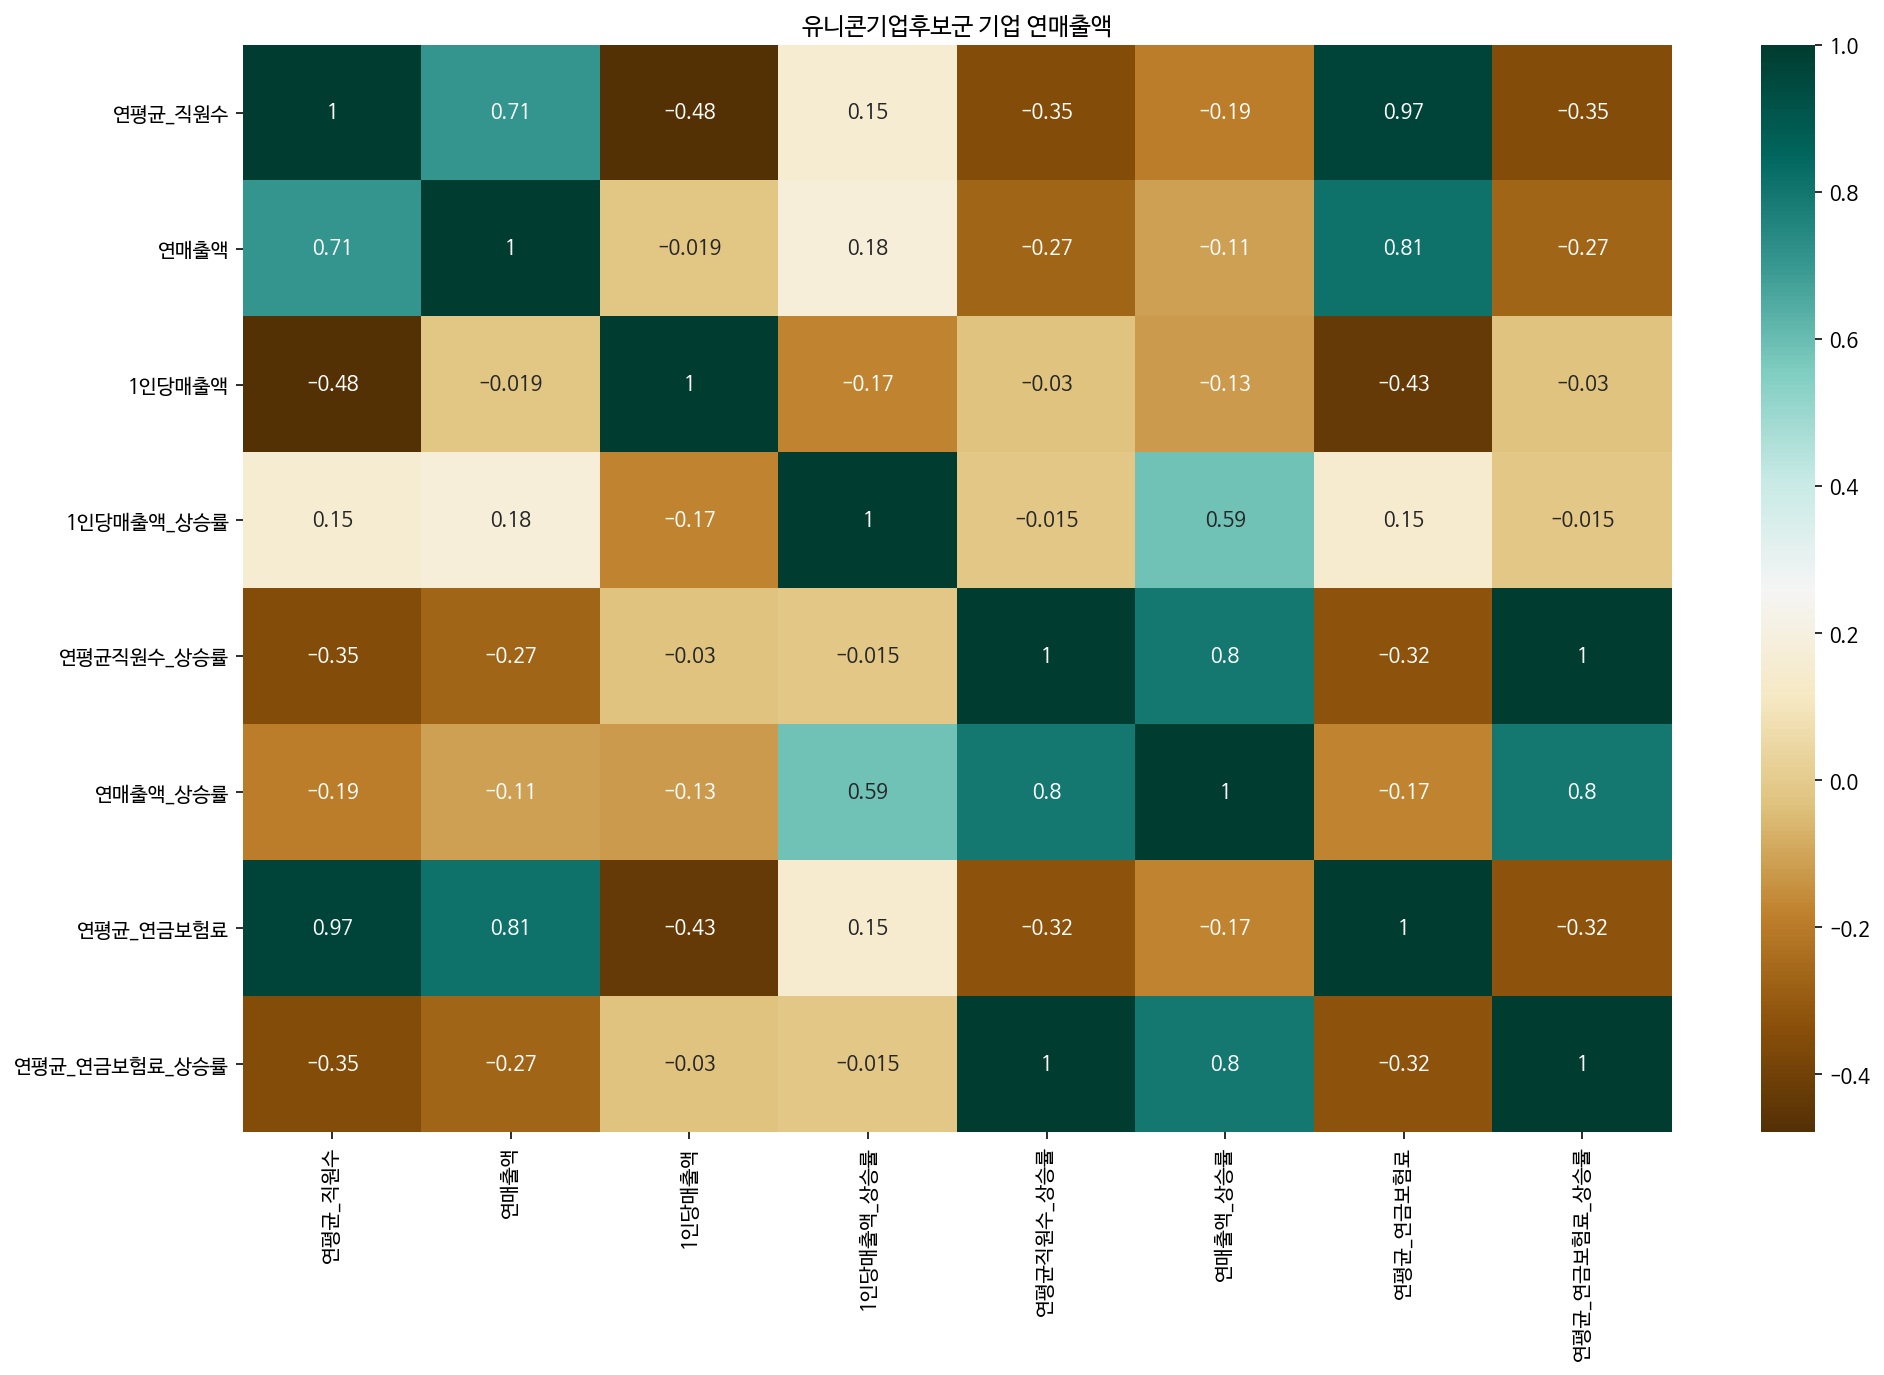

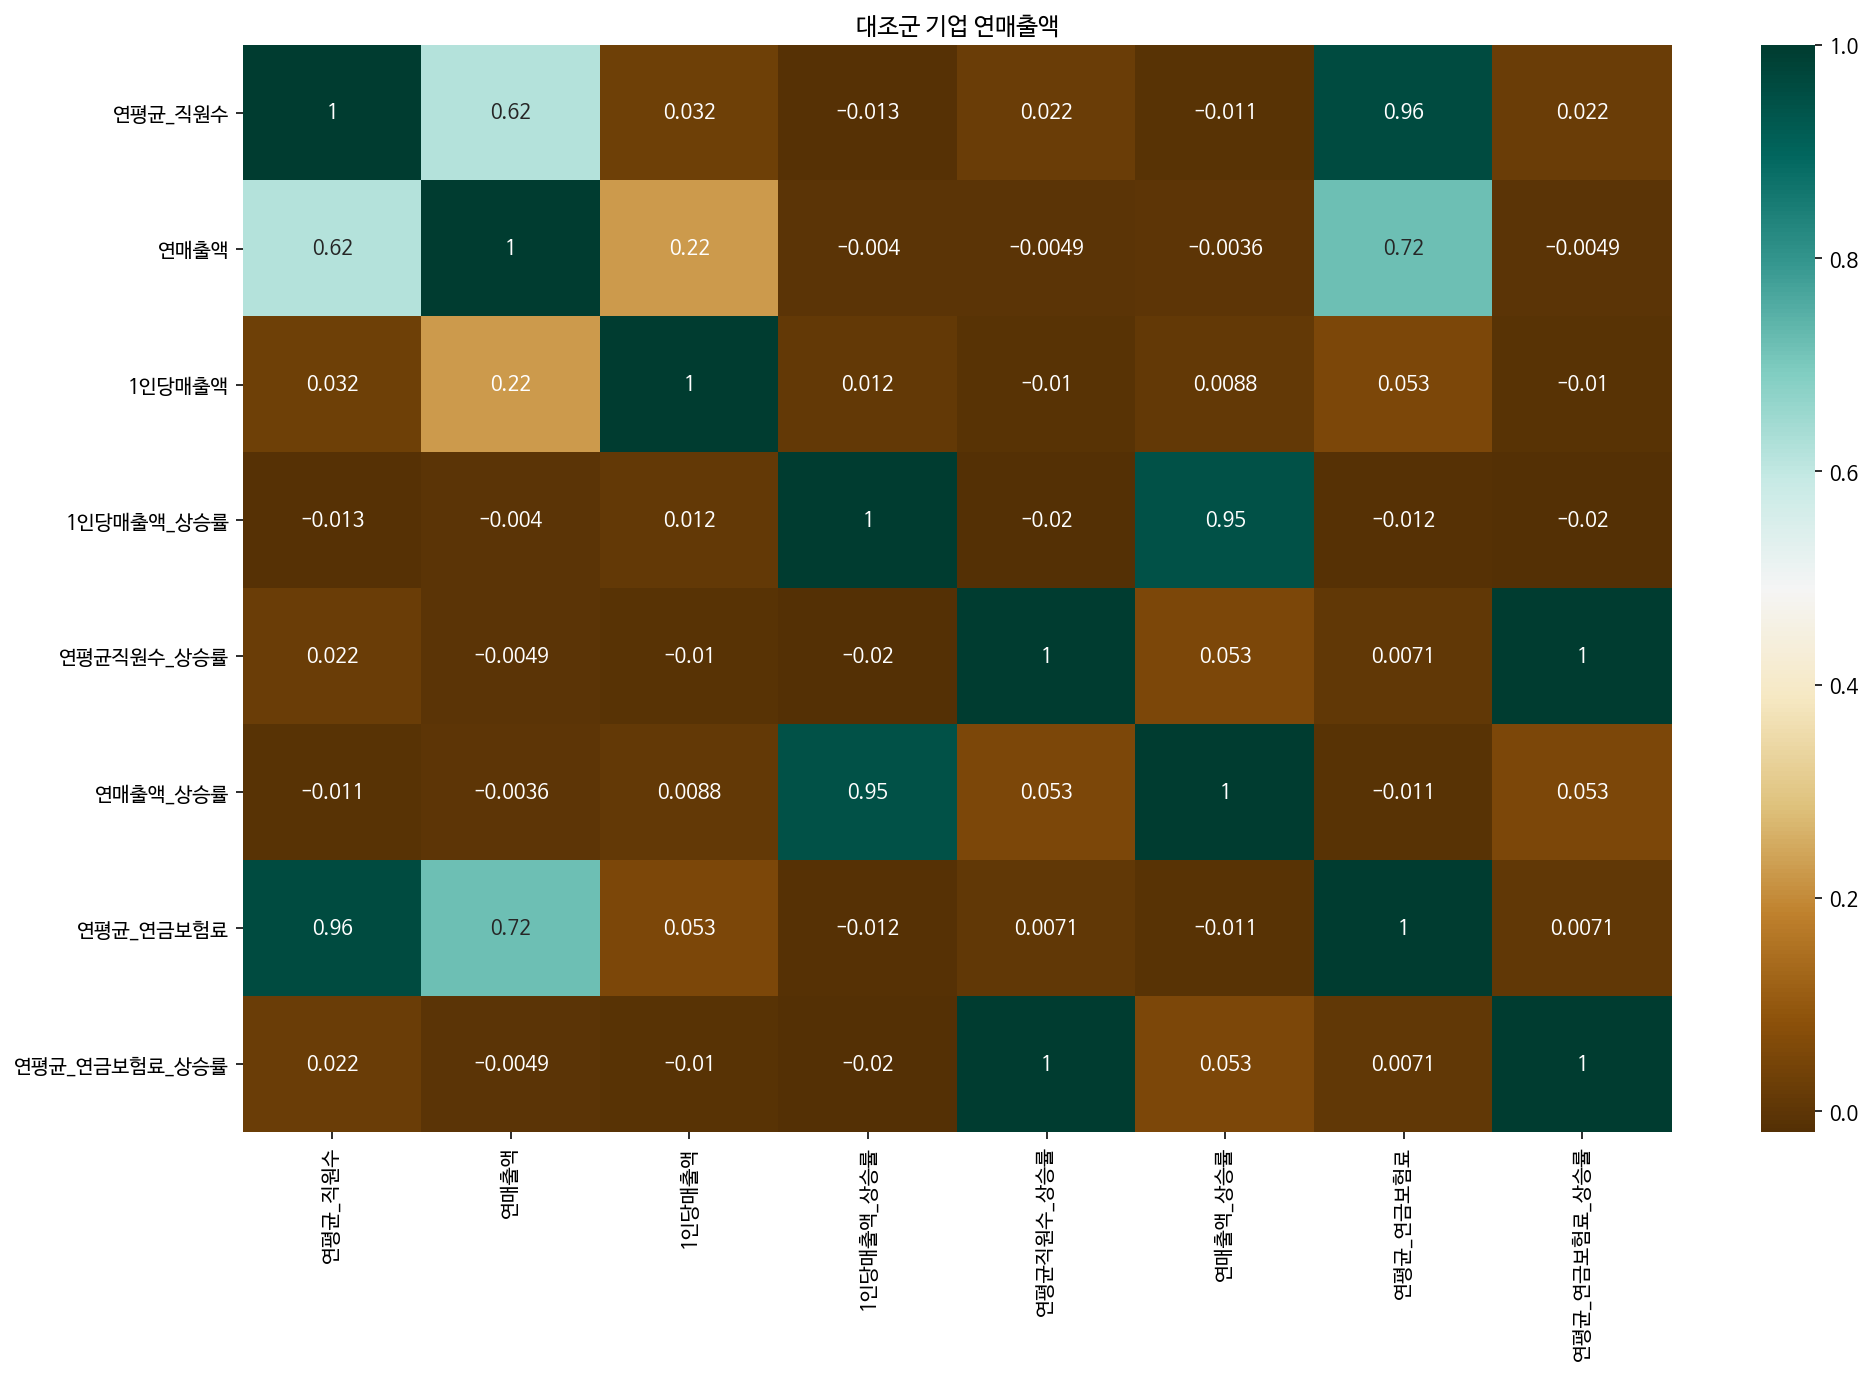

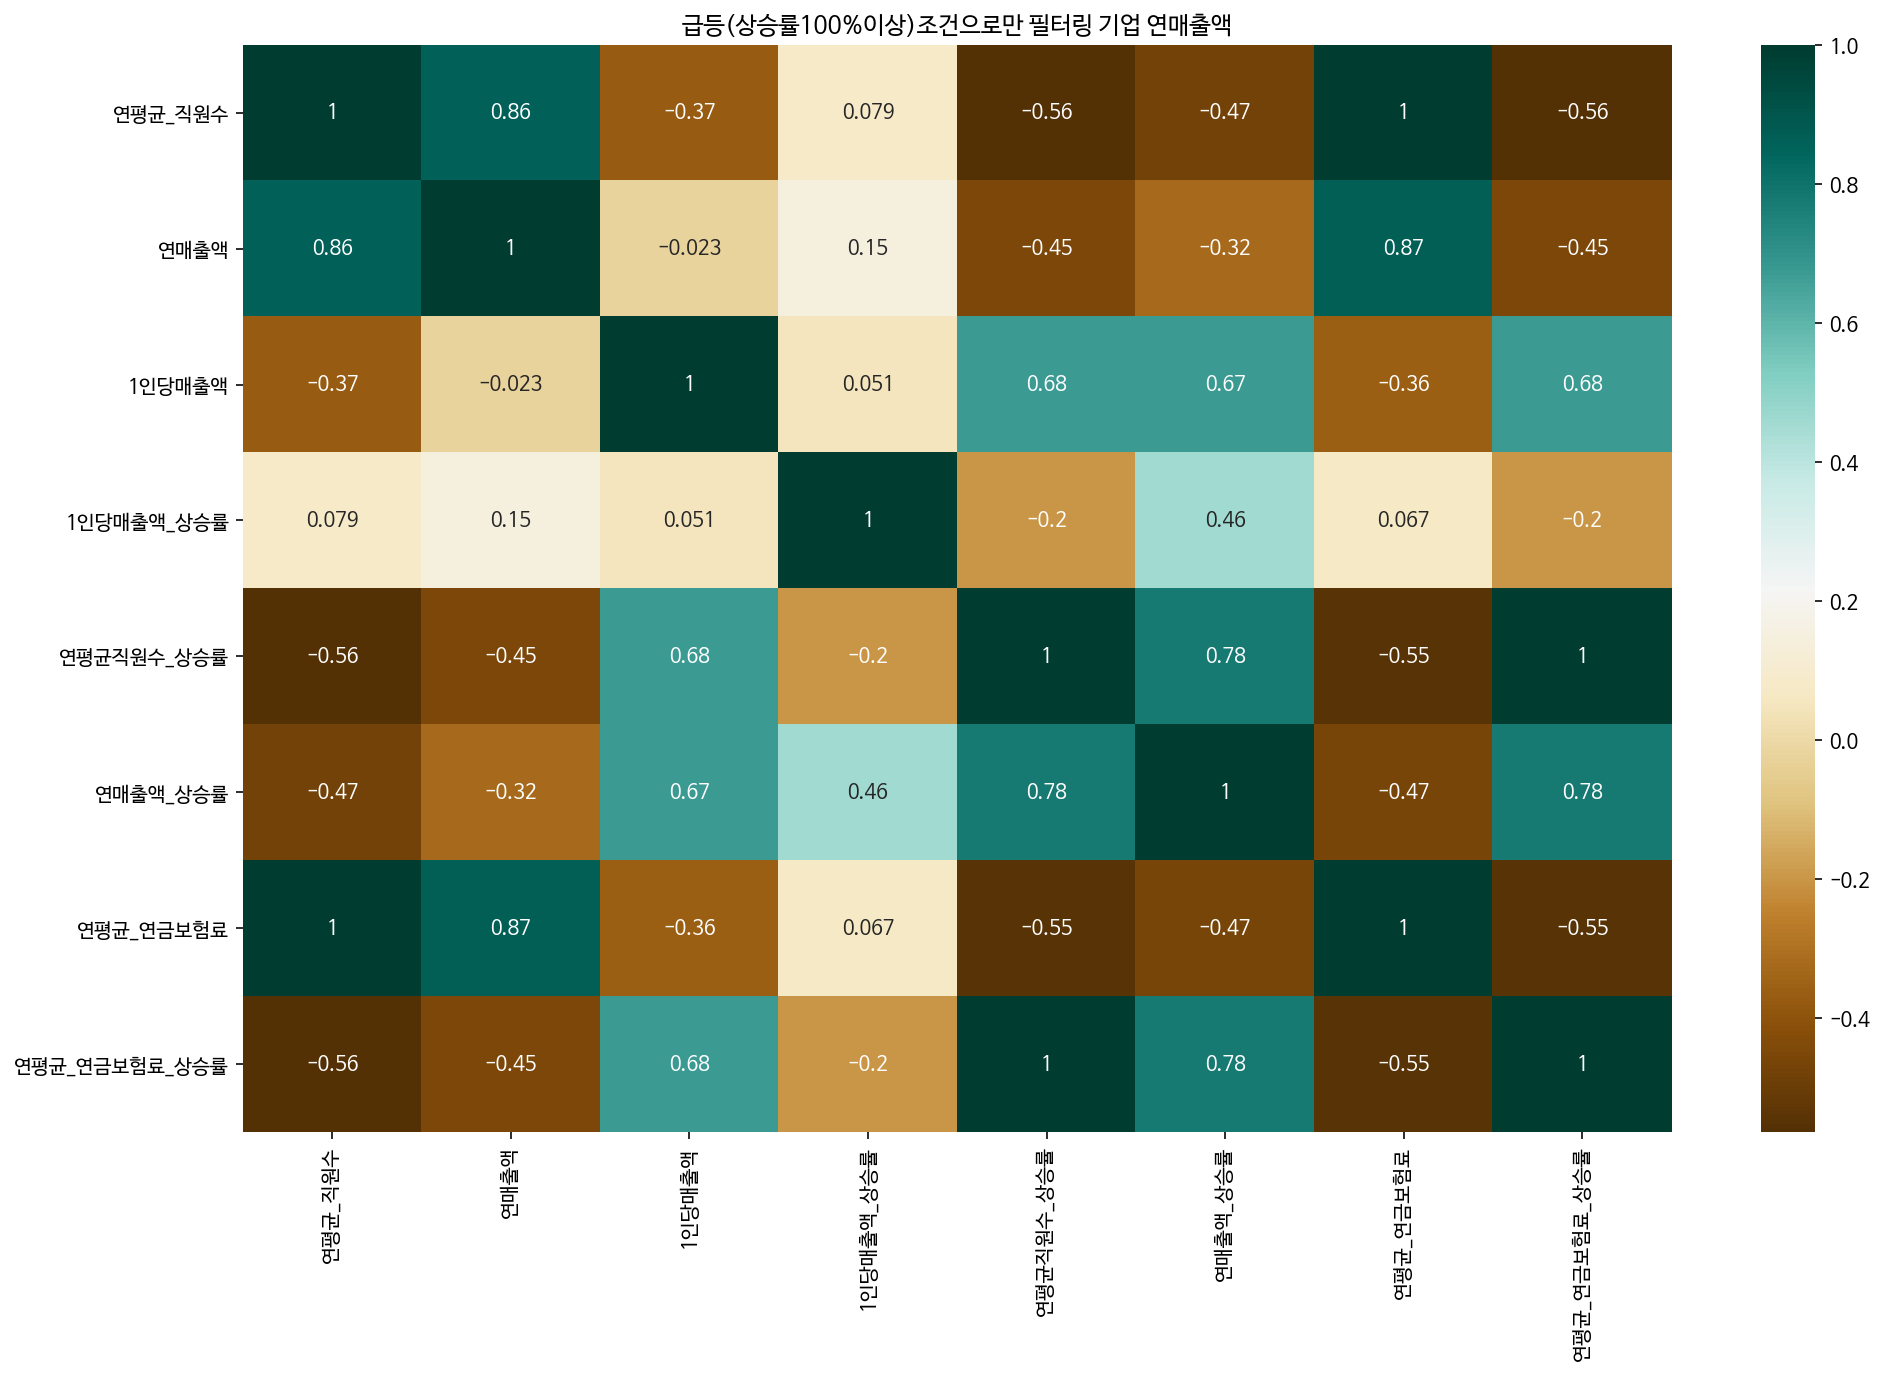

<Figure size 1152x720 with 0 Axes>

In [135]:
# 유니콘 기업 후보군 10개 기업 상관관계 히트맵
mpl.rcParams['axes.unicode_minus'] = False

# plt.rc('font', family=font_name)
# print(font_name)

fig1, ax = plt.subplots(figsize=(16, 10))
plt.title('{} 기업 연매출액'.format('유니콘기업후보군'))

adf = fin_df[['연평균_직원수',	'연매출액',	'1인당매출액',	'1인당매출액_상승률',	'연평균직원수_상승률',	'연매출액_상승률',	'연평균_연금보험료',	'연평균_연금보험료_상승률']]
fig1 = sns.heatmap(adf.corr(), cmap="BrBG", annot=True)

fig2, ax = plt.subplots(figsize=(16, 10))
plt.title('{} 기업 연매출액'.format('대조군'))
bdf = total_df[['연평균_직원수',	'연매출액',	'1인당매출액',	'1인당매출액_상승률',	'연평균직원수_상승률',	'연매출액_상승률',	'연평균_연금보험료',	'연평균_연금보험료_상승률']]
fig2 = sns.heatmap(bdf.corr(), cmap="BrBG", annot=True)
# plt.figure(figsize=(16,10))

fig3, ax = plt.subplots(figsize=(16, 10))
plt.title('{} 기업 연매출액'.format('급등(상승률100%이상)조건으로만 필터링'))
cdf = sudden_df[['연평균_직원수',	'연매출액',	'1인당매출액',	'1인당매출액_상승률',	'연평균직원수_상승률',	'연매출액_상승률',	'연평균_연금보험료',	'연평균_연금보험료_상승률']]
fig3 = sns.heatmap(cdf.corr(), cmap="BrBG", annot=True)
plt.figure(figsize=(16,10))

plt.show()

###유니콘 기업과 대조군의 차이
---
유니콘 기업과 대조군 기업과의 차이를 보건대
### 상관 관계
####유니콘 기업 후보군(10개 기업)
유의미한 상관 관계 : 8

- 연매출액 - 연평균_직원수 0.71
- 연매출액_상승률 - 1인당매출액_상승률 0.59
- 연매출액_상승률 - 연평균직원수_상승률 0.8
- 연평균_연금보험료 - 연평균_직원수 0.97
- 연평균_연금보험료 - 연매출액 0.81
- 연평균_연금보험료_상승률 - 연매출액_상승률 0.8
- 연평균_연금보험료_상승률 - 연평균직원수_상승률 1

#### 대조군
전체 기업 데이터(유니콘 후보군 기업 제외)
유의미한 상관 관계 : 5


- 연매출액 - 연평균직원수 0.62
- 연매출액 상승률 -1인당매출액_상승률 0.95
- 연평균_연금보험료 - 연평균_직원수 0.96
- 연평균_연금보험료 - 연매출액 0.72
- 연평균_연금보험료_상승률 - 연평균직원수_상승률 1

---

유니콘 기업 후보군과 대조군의 가장 큰 차이를  보이는 것이
1. 연매출액 상승률과 연평균 직원수 상승률
2. 연매출액 상승률 과 1인당 매출액 상승률
3. 연평균 연금보혐료 상승률 과 연매출액 상승률
이를 통해 유추 해볼 수 있는 것은 
---
##유니콘 기업의 특징으로


연매출액 상승률과 연평균직원수 상승률의 상관관계가 높고, 
연매출액 상승률과 1인당 매출액 상승률이 대조군에 비해 낮은 편
- 연매출액 상승에 비해 인원 충원이 빠른 편 (기업 가치에 비해 매출이 낮고, 투자를 통해서 규모를 늘리는 유니콘 기업의 특성으로 보여짐)

연평균 연금보혐료 상승률과 연매출액 상승률과의 관계에서 대조군은 상관관계가 없지만 유니콘기업은 상관관계가 있고, 양쪽 모두 연평균 연금보혐료 상승률과 연평균 직원수 상승률은 관계가 있는 것으로도 직원수의 상승으로 매출액이 상승하는 것이 반영된다고 볼 수 있음.

## 기존 유니콘 기업의 특징 
연매출액은 항상 우상향, 직원수는 대부분 우상향, 순간 급등하는 구간이 있음.
** 





In [81]:
fin_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률
71,127366,2015,244,79085060,55796793,228208,nan,nan,nan,nan
72,127366,2016,249,80931918,74306879,298621,31,2,2,33
73,127366,2017,276,90330492,175260490,635194,113,11,11,136
74,127366,2018,315,105214370,206951173,656814,3,14,14,18
112,128405,2015,150,31359910,14204553,94382,nan,nan,nan,nan
113,128405,2016,151,30656773,20362468,134851,43,0,0,43
114,128405,2017,162,33136120,31578595,194930,45,7,7,55
115,128405,2018,185,39922128,36933232,199729,2,14,14,17
323,132335,2015,80,22133360,25300385,314290,nan,nan,nan,nan
324,132335,2016,81,22588880,38887246,479596,53,1,1,54


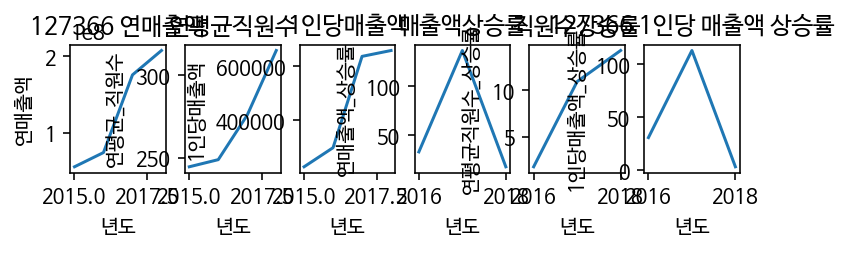

<Figure size 2304x2160 with 0 Axes>

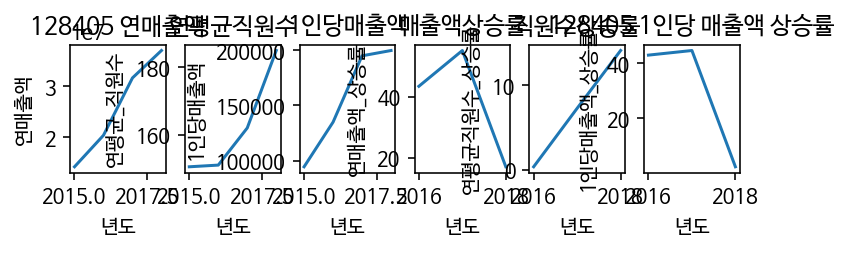

<Figure size 2304x2160 with 0 Axes>

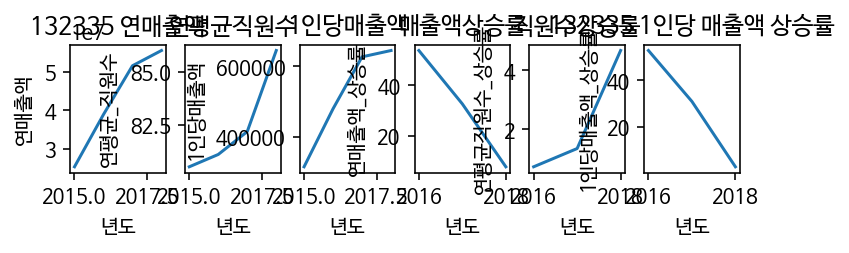

<Figure size 2304x2160 with 0 Axes>

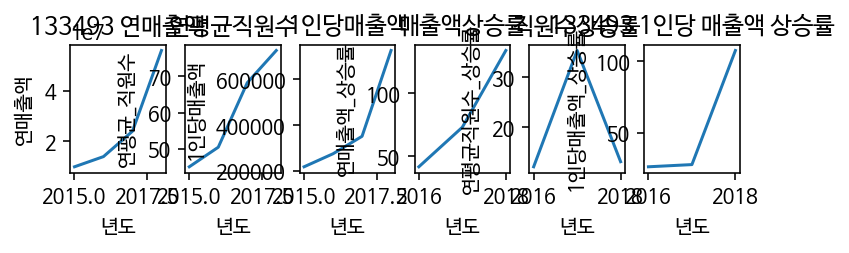

<Figure size 2304x2160 with 0 Axes>

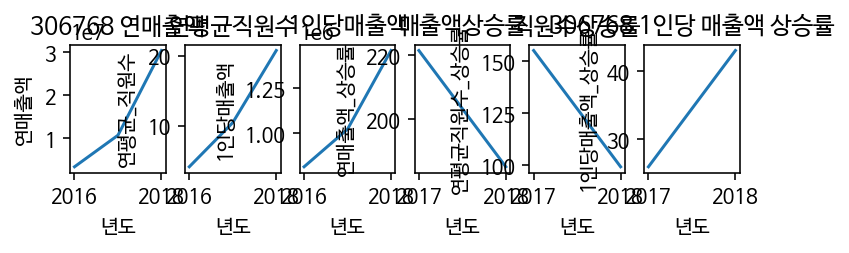

<Figure size 2304x2160 with 0 Axes>

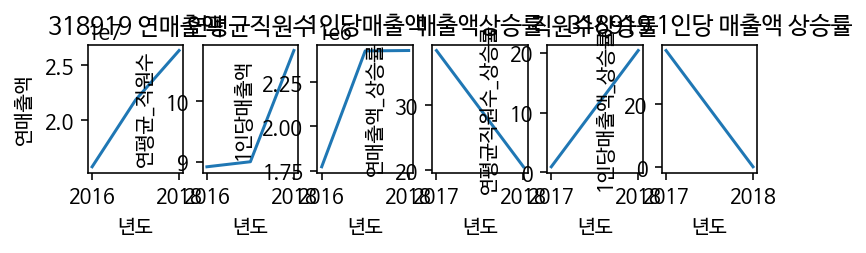

<Figure size 2304x2160 with 0 Axes>

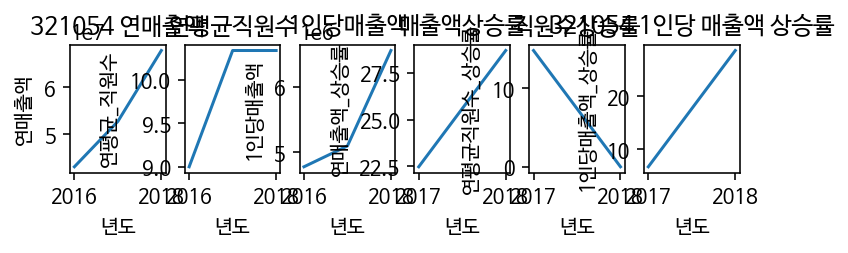

<Figure size 2304x2160 with 0 Axes>

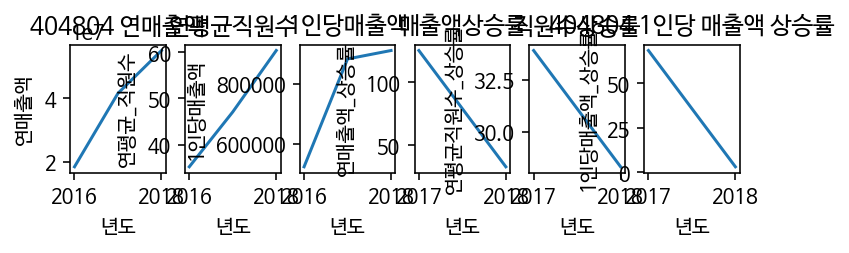

<Figure size 2304x2160 with 0 Axes>

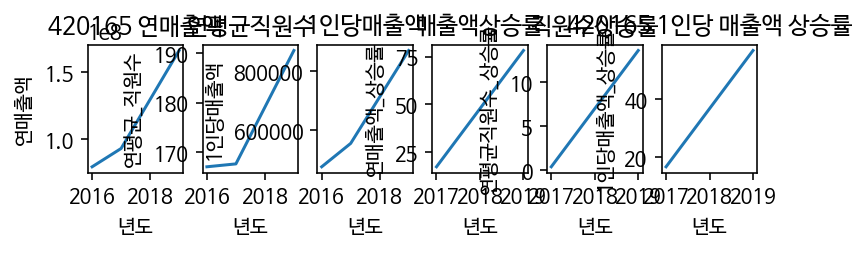

<Figure size 2304x2160 with 0 Axes>

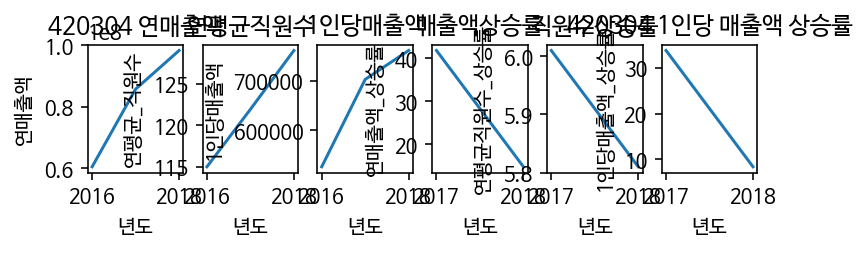

<Figure size 2304x2160 with 0 Axes>

In [84]:
## 연매출액과 직원수가 같이 증가하는 회사를 찾기 위함.
for i in fin_df['회사ID'].unique():
  plt.subplot(361)
  sns.lineplot(fin_df.loc[fin_df['회사ID']==i, '년도'],fin_df.loc[fin_df['회사ID']==i, '연매출액'])
  plt.title('{} 연매출액'.format(i))
  
  plt.subplot(362)
  sns.lineplot(fin_df.loc[fin_df['회사ID']==i, '년도'],fin_df.loc[fin_df['회사ID']==i, '연평균_직원수'])
  plt.title('연평균직원수')
  
  plt.subplot(363)
  sns.lineplot(fin_df.loc[fin_df['회사ID']==i, '년도'],fin_df.loc[fin_df['회사ID']==i, '1인당매출액'])
  plt.title('1인당매출액')

  plt.subplot(364)
  sns.lineplot(fin_df.loc[fin_df['회사ID']==i, '년도'],fin_df.loc[fin_df['회사ID']==i, '연매출액_상승률'])
  plt.title('매출액상승률')
  
  plt.subplot(365)
  sns.lineplot(fin_df.loc[fin_df['회사ID']==i, '년도'],fin_df.loc[fin_df['회사ID']==i, '연평균직원수_상승률'])
  plt.title('직원수상승률')

  plt.subplot(366)
  sns.lineplot(fin_df.loc[fin_df['회사ID']==i, '년도'],fin_df.loc[fin_df['회사ID']==i, '1인당매출액_상승률'])
  plt.title('{} 1인당 매출액 상승률'.format(i))

  plt.figure(figsize=(32,30))
  ## 유니콘 기업은 계속 성장한다는 가정하에.
  # 연매출액/연평균직원수/1인당매출액상승률/연매출액상승률
  plt.show()

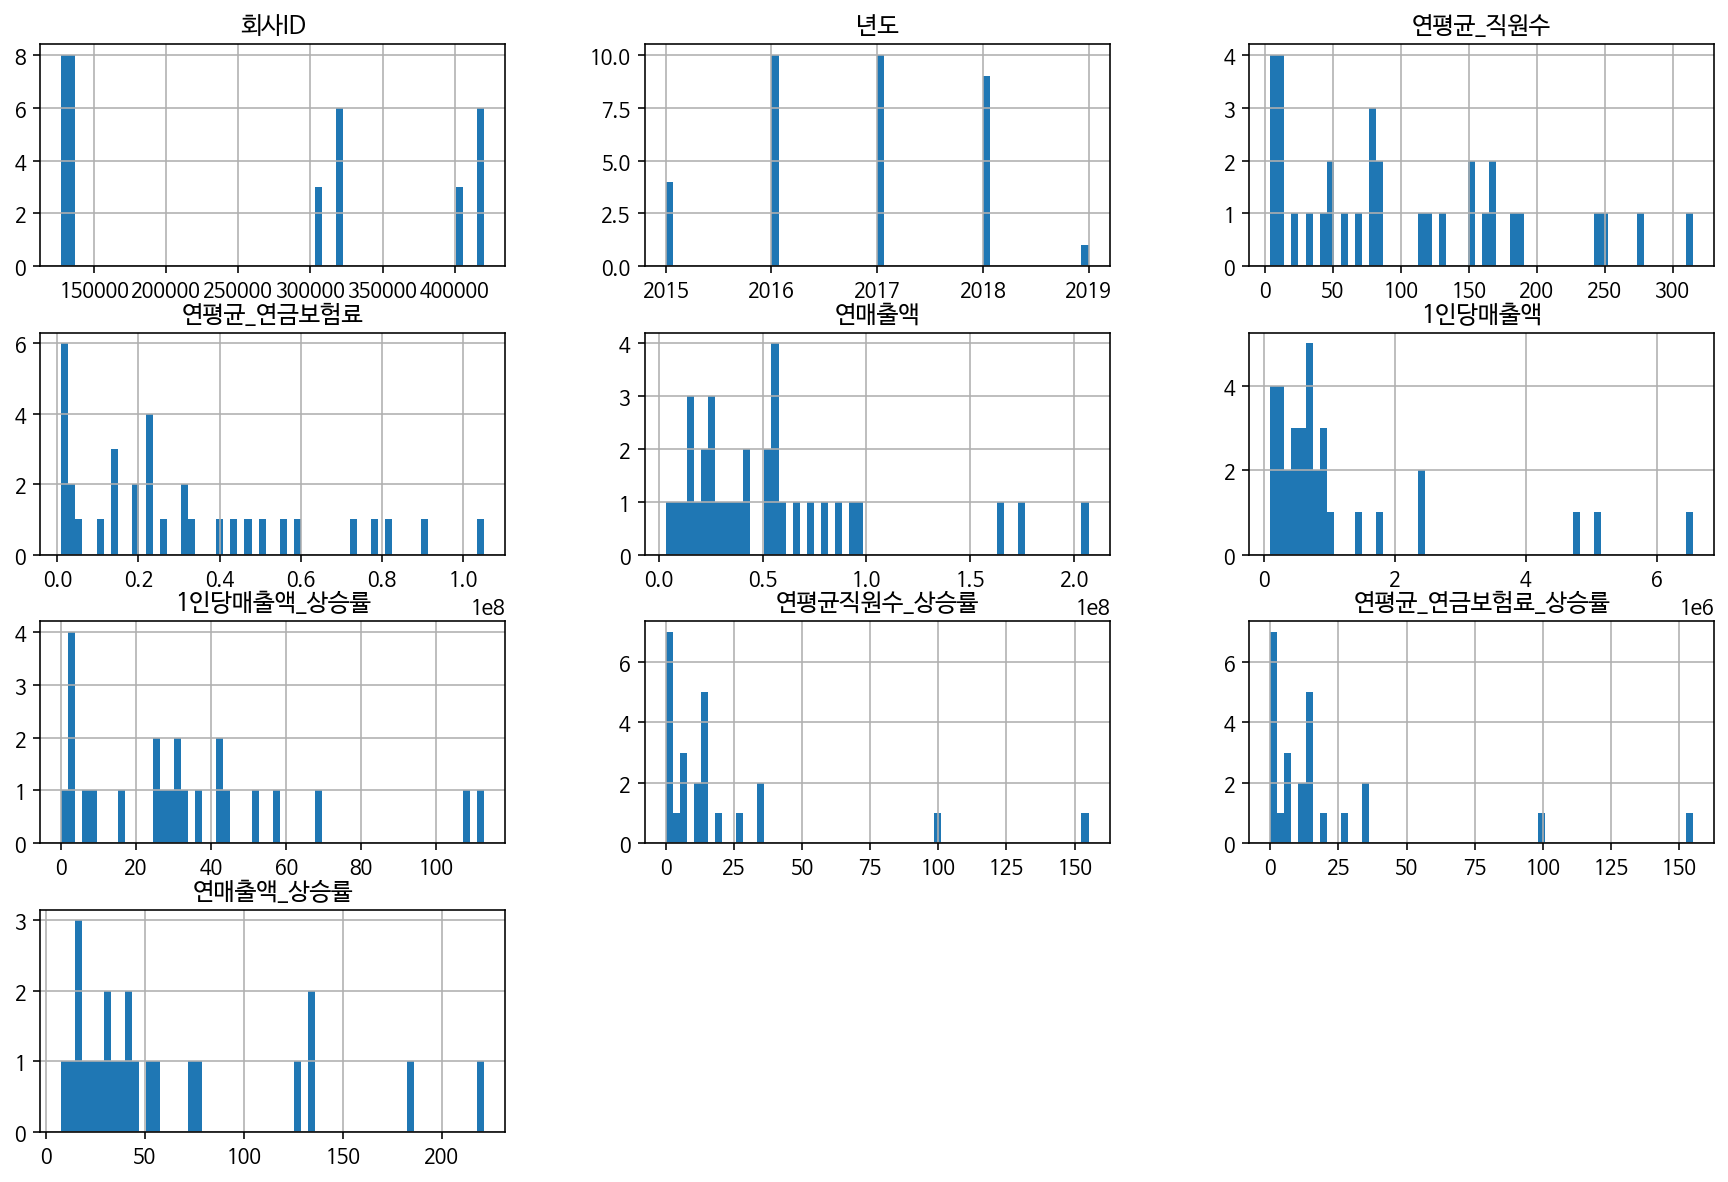

In [85]:
# 유니콘 기업 후보군 데이터 시각화
fin_df.hist(bins=60,figsize=(15,10))
plt.show()

In [123]:
### 유니콘 기업 후보군에 대해서 순위를 매기기 위해 데이터 스케일링 후, 점수 합산을 통해 순위를 구함
### - 그를 위해 이상치 제거는 하지 않음.
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
scaler = RobustScaler()

scaler.fit(np.array(fin_df['연매출액_상승률']).reshape(-1,1))
fin_df['연매출액_scaled'] = scaler.transform(np.array(fin_df['연매출액_상승률']).reshape(-1,1))

scaler.fit(np.array(fin_df['1인당매출액_상승률']).reshape(-1,1))
fin_df['1인당매출액_상승률_scaled'] = scaler.transform(np.array(fin_df['1인당매출액_상승률']).reshape(-1,1))

scaler.fit(np.array(fin_df['연평균직원수_상승률']).reshape(-1,1))
fin_df['연평균직원수_상승률_scaled'] = scaler.transform(np.array(fin_df['연평균직원수_상승률']).reshape(-1,1))
fin_df

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률,연매출액_minmax,연매출액_scaled,1인당매출액_상승률_scaled,연평균직원수_상승률_scaled
71,127366,2015,244,79085060,55796793,228208,nan,nan,nan,nan,nan,nan,nan,nan
72,127366,2016,249,80931918,74306879,298621,31,2,2,33,-0,-0,0,-1
73,127366,2017,276,90330492,175260490,635194,113,11,11,136,2,2,2,-0
74,127366,2018,315,105214370,206951173,656814,3,14,14,18,-0,-0,-1,0
112,128405,2015,150,31359910,14204553,94382,nan,nan,nan,nan,nan,nan,nan,nan
113,128405,2016,151,30656773,20362468,134851,43,0,0,43,0,0,0,-1
114,128405,2017,162,33136120,31578595,194930,45,7,7,55,0,0,0,-0
115,128405,2018,185,39922128,36933232,199729,2,14,14,17,-0,-0,-1,0
323,132335,2015,80,22133360,25300385,314290,nan,nan,nan,nan,nan,nan,nan,nan
324,132335,2016,81,22588880,38887246,479596,53,1,1,54,0,0,1,-1


In [132]:
## 상승률 컬럼을 스케일링 후, 세 컬럼의 합을 점수 컬럼을 만들어 점수별로 순위를 매김
fin_df['점수합'] = fin_df['연평균직원수_상승률_scaled'] + fin_df['1인당매출액_상승률_scaled'] + fin_df['연매출액_scaled']
chq_list = fin_df.sort_values('점수합', ascending=False)['회사ID'].unique().tolist()
fin_df.sort_values('점수합', ascending=False)

,회사ID,년도,연평균_직원수,연평균_연금보험료,연매출액,1인당매출액,1인당매출액_상승률,연평균직원수_상승률,연평균_연금보험료_상승률,연매출액_상승률,연매출액_minmax,연매출액_scaled,1인당매출액_상승률_scaled,연평균직원수_상승률_scaled,점수합
855,306768,2017,10,2836152,10637771,1021226,26,155,155,221,3,3,-0,10,13
856,306768,2018,21,5335293,30319988,1461204,43,99,99,185,3,3,0,6,9
998,404804,2017,47,13386173,41528676,882025,68,34,34,126,2,2,1,2,4
73,127366,2017,276,90330492,175260490,635194,113,11,11,136,2,2,2,-0,4
366,133493,2018,77,22401052,55979430,725435,107,13,13,134,2,2,2,0,4
365,133493,2017,68,18843450,23896664,350134,28,35,35,73,1,1,-0,2,2
1025,420165,2019,190,73195383,165961753,871190,57,14,14,78,1,1,1,0,2
114,128405,2017,162,33136120,31578595,194930,45,7,7,55,0,0,0,-0,0
999,404804,2018,60,18381830,54980374,910020,3,28,28,32,-0,-0,-1,1,0
324,132335,2016,81,22588880,38887246,479596,53,1,1,54,0,0,1,-1,0


In [130]:
chq_list

[306768,
 404804,
 127366,
 133493,
 420165,
 128405,
 132335,
 420304,
 318919,
 321054]

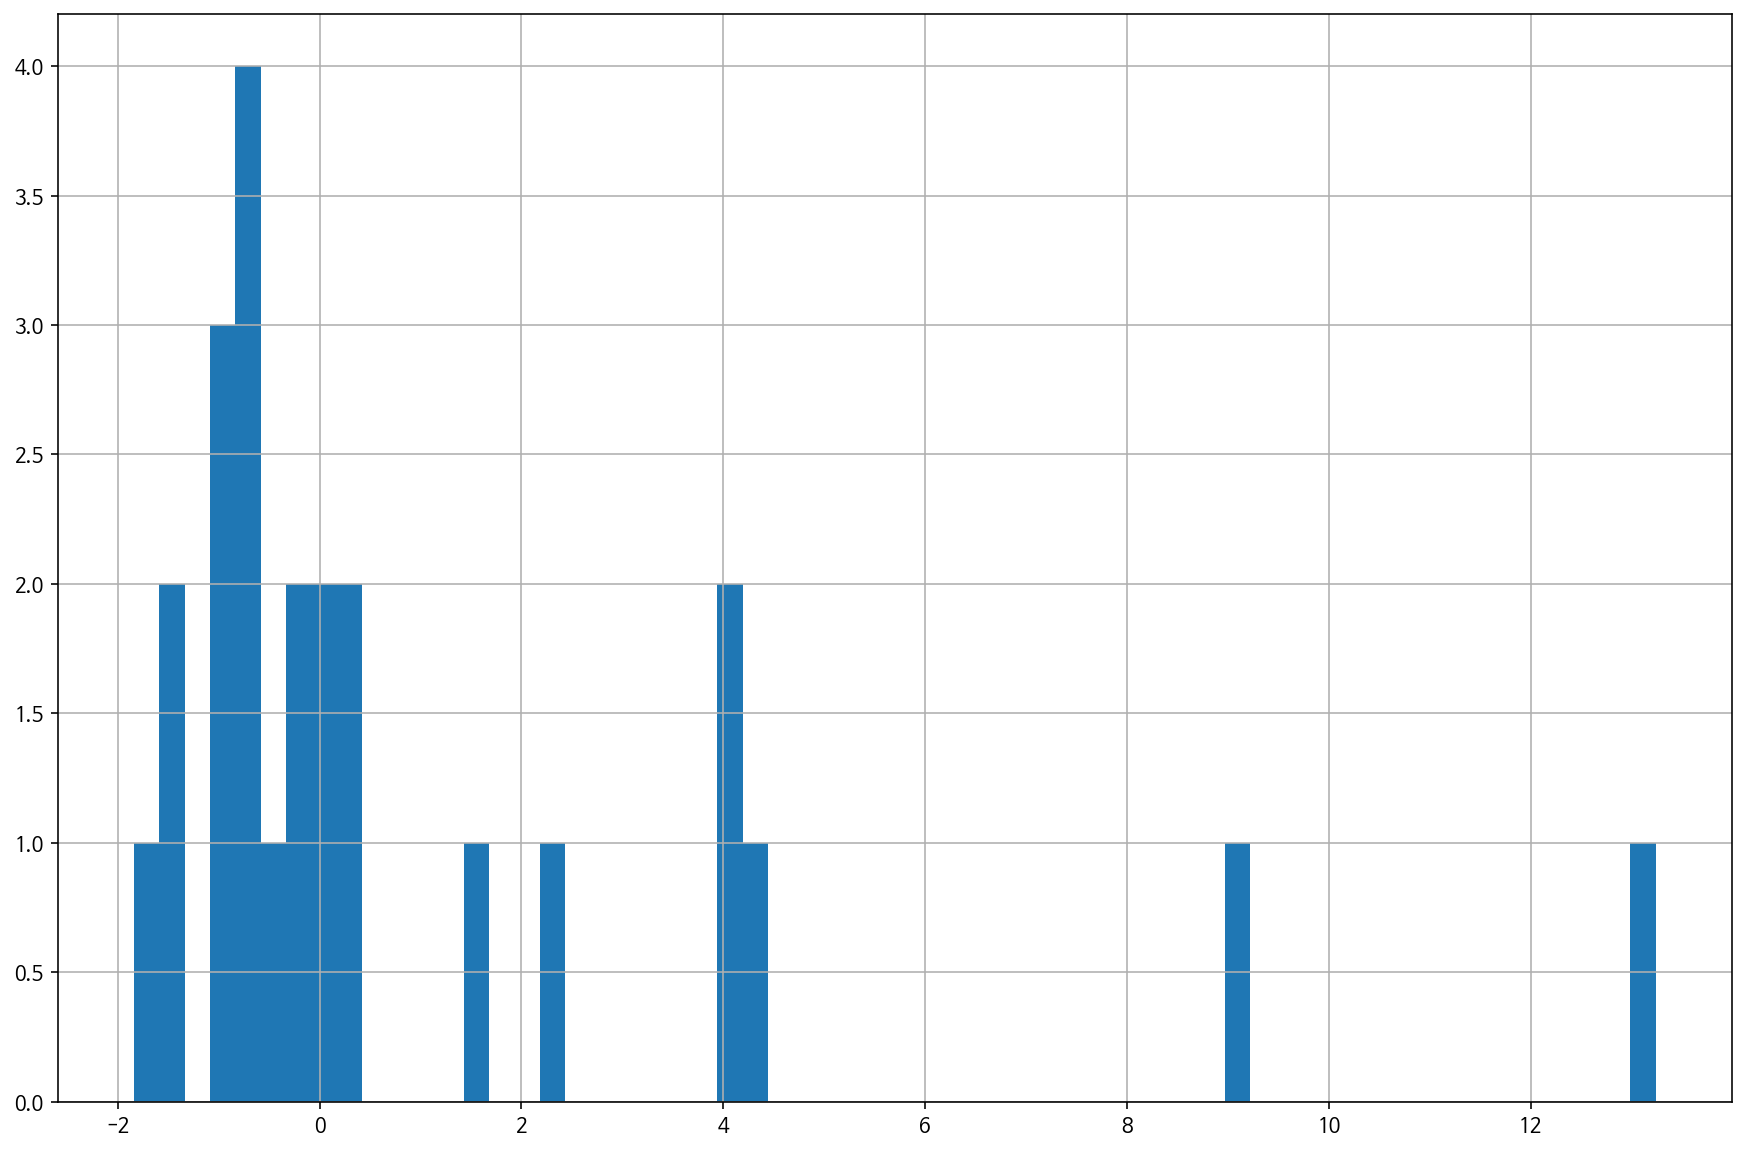

In [140]:
# fin_df[fin_df['회사ID'].isin(chq_list)]['점수합'].hist(bins=60,figsize=(15,10))
fin_df['점수합'].hist(bins=60,figsize=(15,10))